In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Image processing using Open_Cv on Test_image

In [2]:
img = cv2.imread("kholi.jpg")
img.shape

(225, 225, 3)

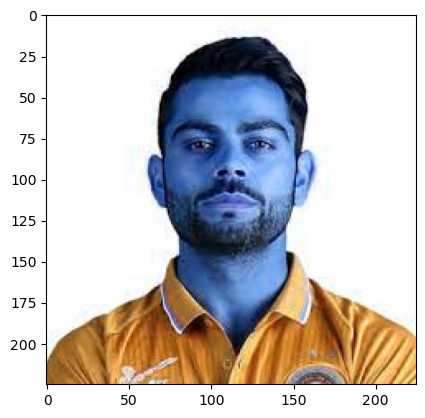

In [3]:
plt.imshow(img)
plt.show()

#### Now we can change the image into grayscale

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

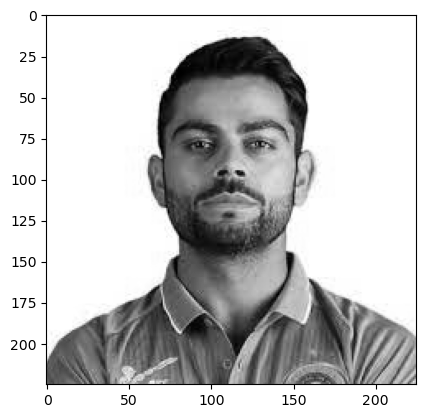

In [5]:
plt.imshow(gray,cmap="gray")
plt.show()

#### Now we can detect the face and eyes of the image using a pre-trained model Haarcascade

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 63,  39, 100, 100]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(63, 39, 100, 100)

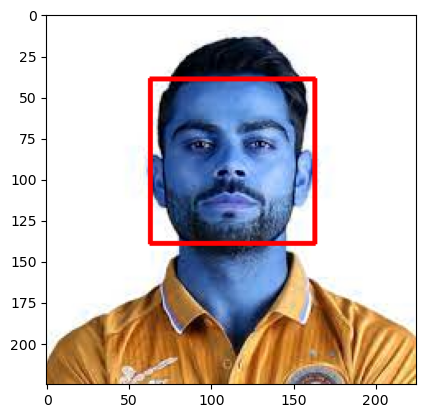

In [8]:
face_img = cv2.rectangle(img, (x,y),(x+w, y+h),(255,0,0), 2)   # (x,y) --> Top left coordinates,
plt.imshow(face_img)                                           # (x+w, y+h)--> bottom right coordinates

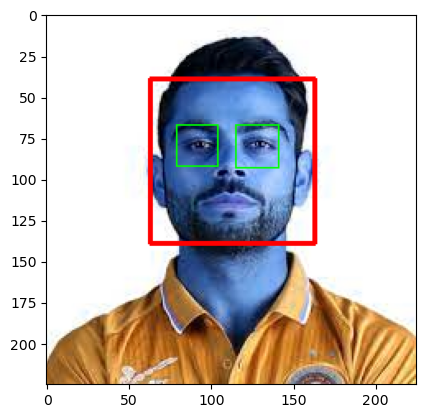

In [9]:
# Now we are detecting eyes within the face

cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y),(x+w,y+h), (255,0,0),1)
    roi_gray = gray[y:y+h, x:x+w]             # slicing the region of intrest  from the image we converted into gray
    roi_color = face_img[y:y+h, x:x+w]        # extracts the region of intrest
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        
plt.figure()
plt.imshow(face_img)
plt.show() 

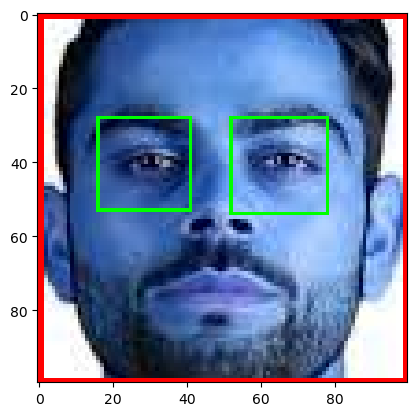

In [10]:
%matplotlib inline
plt.imshow(roi_color)

#### Now we can make a function which returns the cropped images which has both eyes present

In [11]:
def get_cropped_images_with_2_eyes(image_path):
    
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color


#### Let's Try This function on our kholi"s image

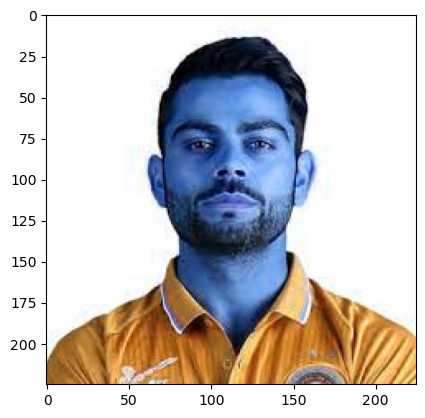

In [12]:
orginal_image = cv2.imread("kholi.jpg")
plt.imshow(orginal_image)

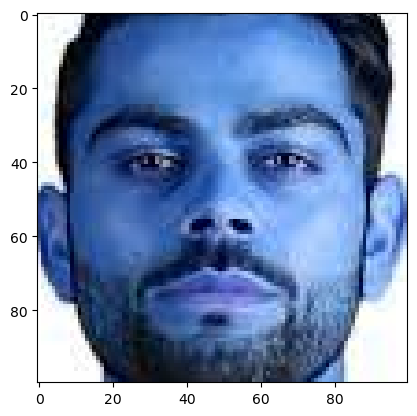

In [13]:
cropped_image = get_cropped_images_with_2_eyes("kholi.jpg")
plt.imshow(cropped_image)

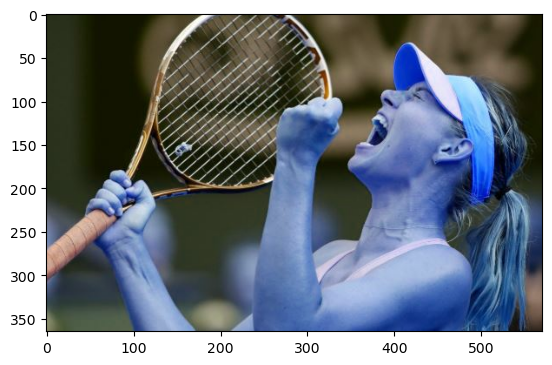

In [14]:
# lets try for another image

image_2 = cv2.imread("sample_img.JPG")
plt.imshow(image_2)


In [15]:
image_2

array([[[ 39,  46,  25],
        [ 39,  46,  25],
        [ 39,  46,  25],
        ...,
        [ 26,  26,   2],
        [ 26,  26,   2],
        [ 26,  26,   2]],

       [[ 39,  46,  25],
        [ 39,  46,  25],
        [ 39,  46,  25],
        ...,
        [ 26,  26,   2],
        [ 26,  26,   2],
        [ 26,  26,   2]],

       [[ 39,  46,  25],
        [ 39,  46,  25],
        [ 39,  46,  25],
        ...,
        [ 26,  26,   2],
        [ 26,  26,   2],
        [ 26,  26,   2]],

       ...,

       [[138, 139, 107],
        [136, 137, 105],
        [132, 133, 101],
        ...,
        [ 53,  42,  34],
        [ 52,  41,  33],
        [ 51,  40,  32]],

       [[136, 137, 105],
        [134, 135, 103],
        [130, 131,  99],
        ...,
        [ 50,  39,  31],
        [ 49,  38,  30],
        [ 48,  37,  29]],

       [[134, 135, 103],
        [132, 133, 101],
        [128, 129,  97],
        ...,
        [ 47,  38,  29],
        [ 46,  37,  28],
        [ 45,  36,  27]]

In [16]:
c_image = get_cropped_images_with_2_eyes('sample_img.JPG')
c_image

Here we can see no arrays as the eyes of the image is not detecting by our function

#### creating a list of sub directories

In [17]:
path_to_data = "./images_dataset/"
path_to_cr_data = "./images_dataset/cropped/"

In [18]:
import os
img_dirs =[]
for entry in os.scandir(path_to_data):   # goes through all the sub dir within the image_dataset dir
    if entry.is_dir():                   # if the entry is a dir it will append to img_dirs
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

#### Creating a folder / sub directory for cropped_images

In [20]:
import shutil

if os.path.exists(path_to_cr_data):        # if the folder exists
    shutil.rmtree(path_to_cr_data)         # remove that 
os.mkdir(path_to_cr_data)                  # create a new folder

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict= {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split("/")[-1]        
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_images_with_2_eyes(entry.path)          # creating roi for all images in the dir
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name           # creating a folder name for croppped images
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)                             # making dir within the cropped folder
                cropped_image_dirs.append(cropped_folder)               # storing it as list
                print("Generating cropped images in folder: ", cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)           # saving the cropped images with corresponding path
             
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli


After checking our cropped images we can see images which are blur and those are of others. 
so we have to manually delete those images

#### 2D Wavelet Decomposition

In [22]:
import numpy as np
import pywt
import cv2

def w2d (img ,mode = "haar" , level =1):         # function used for 2D wavelet decomposition of normalised grayscale images
    imArray = img
    # Datatype conversions
    # convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # convert to float
    imArray =  np.float32(imArray)
    imArray /= 255
    # compure coefficients
    coeffs = pywt.wavedec2(imArray, mode , level = level)   # returns tuple of coefficients for each decomposition 
    
    # process coefficients         
    coeffs_H = list(coeffs)  # The approximated coefficients are set to set to zero which removes the low frequency components from the images
    coeffs_H[0] *= 0     
       
    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);   # reconstructing coeffients
    imArray_H *= 255                             # rescaling the images
    imArray_H = np.uint8(imArray_H)              # converting to 8bit format
    
    return imArray_H

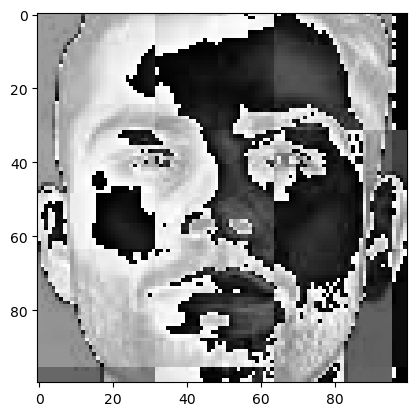

In [23]:
im_har = w2d(cropped_image,"db1",5)
plt.imshow(im_har, cmap="gray")

In [24]:
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped/lionel_messi/lionel_messi1.png',
  './images_dataset/cropped/lionel_messi/lionel_messi2.png',
  './images_dataset/cropped/lionel_messi/lionel_messi3.png',
  './images_dataset/cropped/lionel_messi/lionel_messi4.png',
  './images_dataset/cropped/lionel_messi/lionel_messi5.png',
  './images_dataset/cropped/lionel_messi/lionel_messi6.png',
  './images_dataset/cropped/lionel_messi/lionel_messi7.png',
  './images_dataset/cropped/lionel_messi/lionel_messi8.png',
  './images_dataset/cropped/lionel_messi/lionel_messi9.png',
  './images_dataset/cropped/lionel_messi/lionel_messi10.png',
  './images_dataset/cropped/lionel_messi/lionel_messi11.png',
  './images_dataset/cropped/lionel_messi/lionel_messi12.png',
  './images_dataset/cropped/lionel_messi/lionel_messi13.png',
  './images_dataset/cropped/lionel_messi/lionel_messi14.png',
  './images_dataset/cropped/lionel_messi/lionel_messi15.png',
  './images_dataset/cropped/lionel_messi/lionel_messi16.png',
 

#### Now we use the wavelet transformed images and the cropped images to train our model

In [25]:
class_dict = {}
count = 0
for name in celebrity_file_names_dict.keys():
    class_dict[name] = count
    count +=1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [26]:
X = []
y = []
for celeb_name , training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        
        if img is None:
            continue
            
        scaled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, "db1", 5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        
        # Vertically stacking the images using numpy
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_dict[celeb_name])
        
        
        

In [27]:
len(X)

187

In [28]:
len(y)

187

In [29]:
len(X[0])

4096

In [30]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(187, 4096)

### Model Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#### Hyperparameter Tunning

In [32]:
model_params = {
    "svc" :{
        "model" : SVC(),
        "model_params" :{
            "svc__C" : [0.1,1,10,100],
            "svc__kernel":["linear","rbf","sigmoid"]
        }
    },
    "logistic_regression" : {
        "model": LogisticRegression(),
        "model_params" :{
            "logisticregression__C" : [0.1, 1, 10]
        }
    },
    "decision_trees" : {
        "model" : DecisionTreeClassifier(),
        "model_params":{
            "decisiontreeclassifier__max_depth": [10,20,30],
            "decisiontreeclassifier__min_samples_leaf":[1,2,4]
        }
    }
}

import pandas as pd
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp["model"])
    gs = GridSearchCV(pipe, mp["model_params"], cv = 5, return_train_score=False)
    gs.fit(X_train, y_train)
    
    scores.append({
        "best_model" : algo,
        "best_score" : gs.best_score_,
        "best_params": gs.best_params_
    })
    best_estimators[algo] = gs.best_estimator_
    
Scores = pd.DataFrame(scores)
Scores

,best_model,best_score,best_params
0,svc,0.765057,"{'svc__C': 0.1, 'svc__kernel': 'linear'}"
1,logistic_regression,0.771724,{'logisticregression__C': 0.1}
2,decision_trees,0.543678,"{'decisiontreeclassifier__max_depth': 30, 'dec..."


In [33]:
best_estimators

{'svc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=0.1, kernel='linear'))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(C=0.1))]),
 'decision_trees': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(max_depth=30))])}

In [34]:
best_estimators["svc"].score(X_test, y_test)

0.8421052631578947

In [35]:
best_estimators["logistic_regression"].score(X_test, y_test)

0.8157894736842105

In [36]:
best_estimators["decision_trees"].score(X_test, y_test)

0.5

#### Now we can use SVC  as our best_fit model

In [37]:
best_model = best_estimators["svc"]

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))
cm

array([[ 7,  0,  0,  1,  1],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  4,  1,  0],
       [ 0,  0,  0,  6,  0],
       [ 1,  2,  0,  0, 10]], dtype=int64)

#### We can draw a confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

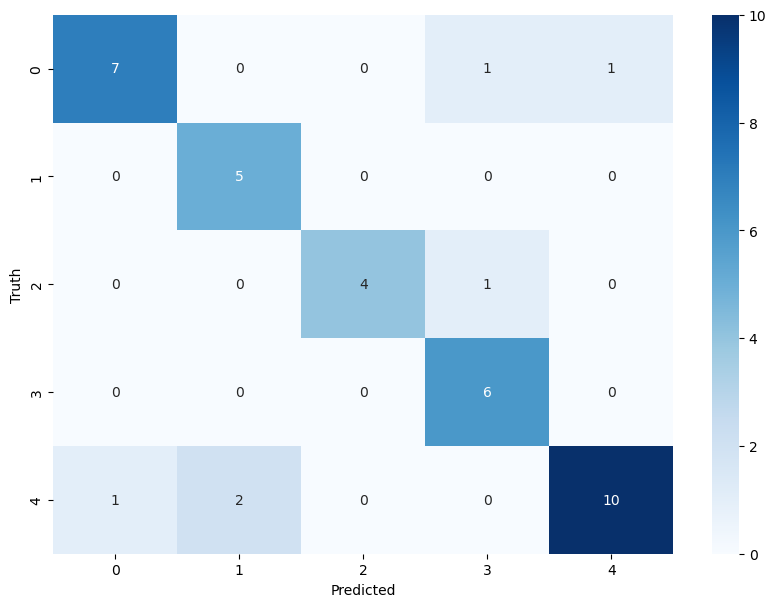

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
print(classification_report(y_test,best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.71      1.00      0.83         5
           2       1.00      0.80      0.89         5
           3       0.75      1.00      0.86         6
           4       0.91      0.77      0.83        13

    accuracy                           0.84        38
   macro avg       0.85      0.87      0.85        38
weighted avg       0.86      0.84      0.84        38



here we can see we got a accuracy score of 84%

#### Now we can save our model

In [41]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_model, 'saved_model.pkl') 

['saved_model.pkl']

#### save our class dict for further use

In [42]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

#### Now we can make a function which will predict the name of the person in the image

In [43]:
def get_key_from_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None

def predict_name_image(file_path):
    image = get_cropped_images_with_2_eyes(file_path)
    scaled_raw_image = cv2.resize(image, (32,32))
    image_har = w2d(image,"db1",5)
    scaled_image_har = cv2.resize(image_har,(32,32))
    
    combined_image = np.stack(np.vstack((scaled_raw_image.reshape(32*32*3,1), scaled_image_har.reshape(32*32, 1))))
    X = combined_image
    X = X.reshape(1, -1)  # Transpose X to have shape (1, num_features)
    X = np.array(X).reshape(len(X), 4096).astype(float)  # Reshape X

    value = best_model.predict(X)[0]
    
    key = get_key_from_value(class_dict,value)
    print(key)
    
    

#### Now we can try to predict a test_image using this function

In [44]:
predict_name_image("test_image1.png")

virat_kohli


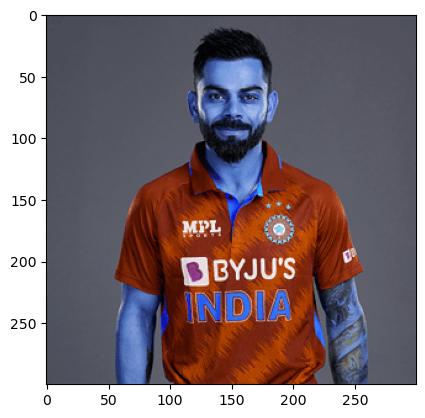

In [45]:
test_image1 = cv2.imread("test_image1.png")
plt.imshow(test_image1)
plt.show()

See the model is predicting correctly

#### Trying to predict the second image

In [46]:
predict_name_image("test_image2.jpg")

lionel_messi


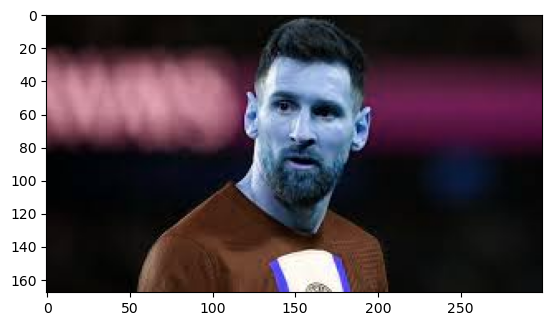

In [47]:
test_image2 = cv2.imread("test_image2.jpg")
plt.imshow(test_image2)
plt.show()

Here also we got the right prediction

#### Let's try on the last image

In [48]:
predict_name_image("test_image3.jpg")

maria_sharapova


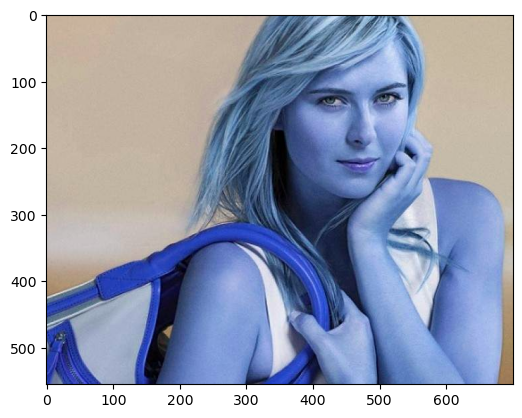

In [49]:
test_image3 = cv2.imread("test_image3.jpg")
plt.imshow(test_image3)
plt.show()

Thats it